<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/tensorflow8_cats_vs_dogs_classifier_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
local_zip= '/content/training_set.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dogs_cats_sample_1000')
local_zip= '/content/test_set.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dogs_cats_sample_1000')
zip_ref.close()

In [0]:
train_cats_dir= os.path.join('/content/dogs_cats_sample_1000/training_set/cats')
train_dogs_dir= os.path.join('/content/dogs_cats_sample_1000/training_set/dogs')
test_cats_dir= os.path.join('/content/dogs_cats_sample_1000/test_set/cats')
test_dogs_dir= os.path.join('/content/dogs_cats_sample_1000/test_set/dogs')

In [0]:
print('Total train cats images: ',len(os.listdir(train_cats_dir)))
print('Total train dogs images: ',len(os.listdir(train_dogs_dir)))
print('Total test cats images: ',len(os.listdir(test_cats_dir)))
print('Total test dogs images: ',len(os.listdir(test_dogs_dir)))

Total train cats images:  4001
Total train dogs images:  4006
Total test cats images:  1012
Total test dogs images:  1013


In [0]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Data Augmentation
**Different features of data augmentation are:**


1.   **rescale -** It is used for normalization(convert of 255 scale image to any other scale image). 
2.   **rotation_range -** It rotates the image to an angle.
3.   **width_shift_range -** this argument changes the width of the image to make it recognizable.
4.   **height_shift_range -** this argument changes the height of the image to make it recognizable.
5.   **shear_range -** It moves the image to certain angle to the x or the y axis.
6.   **zoom_range -** It zoom the image to certain range that it can be seen alike to a training image.
7.   **horizontal_flip -** It is a technique in which we can see the mirror image of the given image.
8.   **fill_mode -** It is an argument that fills the missing pixel of the image.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/dogs_cats_sample_1000/training_set',
                                            target_size=(300,300),
                                            batch_size=161,
                                            class_mode='binary')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/dogs_cats_sample_1000/test_set',
                                            target_size=(300,300),
                                            batch_size=41,
                                            class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [0]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=15,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2 )

Epoch 1/15
50/50 - 258s - loss: 0.6875 - acc: 0.5663 - val_loss: 0.6565 - val_acc: 0.6016
Epoch 2/15
50/50 - 218s - loss: 0.7499 - acc: 0.6034 - val_loss: 0.6841 - val_acc: 0.5487
Epoch 3/15
50/50 - 216s - loss: 0.6938 - acc: 0.6072 - val_loss: 0.6728 - val_acc: 0.5833
Epoch 4/15
50/50 - 218s - loss: 0.6653 - acc: 0.6344 - val_loss: 0.6437 - val_acc: 0.6792
Epoch 5/15
50/50 - 217s - loss: 0.6417 - acc: 0.6523 - val_loss: 1.2587 - val_acc: 0.5279
Epoch 6/15
50/50 - 217s - loss: 0.6492 - acc: 0.6447 - val_loss: 0.6121 - val_acc: 0.6777
Epoch 7/15
50/50 - 217s - loss: 0.6130 - acc: 0.6665 - val_loss: 0.6908 - val_acc: 0.5739
Epoch 8/15
50/50 - 216s - loss: 0.6003 - acc: 0.6834 - val_loss: 0.6030 - val_acc: 0.6634
Epoch 9/15
50/50 - 217s - loss: 0.5806 - acc: 0.6967 - val_loss: 0.5588 - val_acc: 0.7192
Epoch 10/15
50/50 - 217s - loss: 0.5711 - acc: 0.7019 - val_loss: 0.5384 - val_acc: 0.7385
Epoch 11/15
50/50 - 215s - loss: 0.5570 - acc: 0.7119 - val_loss: 0.5327 - val_acc: 0.7341
Epoch 12

In [0]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Prediction on unknown images

Saving 620-pooch-3.jpg to 620-pooch-3 (1).jpg
Saving download (1).jpg to download (1) (1).jpg
Saving download (2).jpg to download (2) (1).jpg
Saving download.jpg to download (3).jpg
Saving file-20180212-58348-7huv6f.jpeg to file-20180212-58348-7huv6f (1).jpeg
Saving german-shepherd-dog-card-small.jpg to german-shepherd-dog-card-small (1).jpg
Saving kittens-e1460122037725.jpg to kittens-e1460122037725 (1).jpg
Saving Utkarsh Mishra.jpg to Utkarsh Mishra (1).jpg
Saving world-of-dogs-06.jpg to world-of-dogs-06 (1).jpg


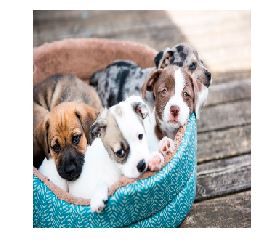

[0.]
The image is of a dog


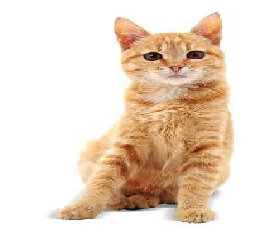

[0.]
The image is of a dog


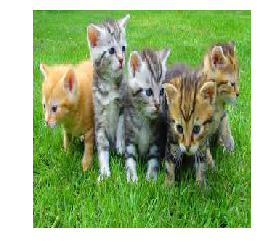

[1.]
The image is of a cat


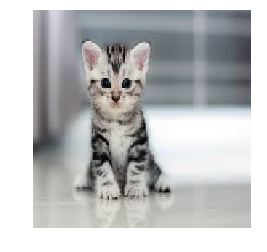

[0.]
The image is of a dog


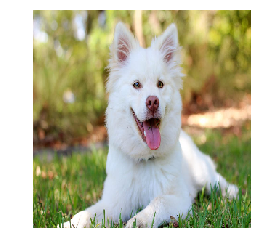

[1.]
The image is of a cat


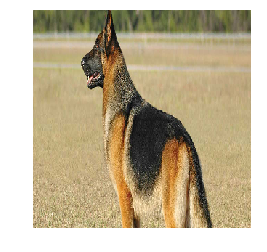

[1.]
The image is of a cat


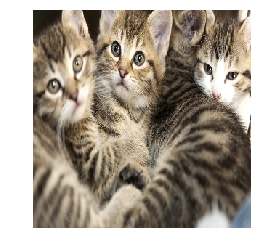

[0.]
The image is of a dog


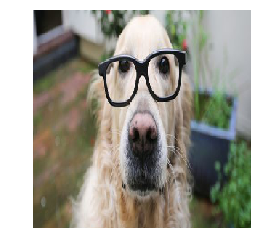

[0.]
The image is of a dog


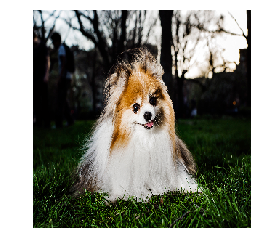

[1.]
The image is of a cat


In [0]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0]>0.5):
    print('The image is of a cat')
    
  else:
    print('The image is of a dog')
  

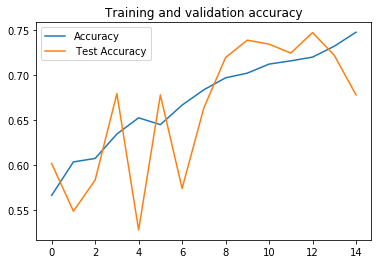

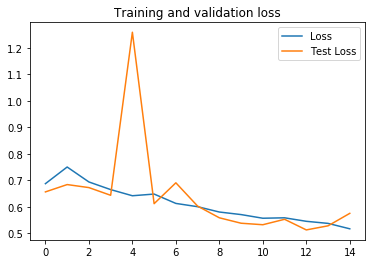

In [0]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()